## AKONA CIKO _PROJECT

#### README.md:

#### Requirement.txt|file:

#### Necessary Libraries & Packages

#### Methodology:

#### Dependencies:

#### License:

### Table of contents

#### Necessary Libraries & Packages:

In [8]:
!pip install xgboost

In [3]:
# python_

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [ ]:
-----------------------------------------------------> Lets START building our MODEL <------------------------------------------------------------------

### 1. Introduction:

### -----------------------------------------------------------------------------------------------------------------------------------

In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


### -----------------------------------------------------------------------------------------------------------------------------------

In [4]:
import os

print(os.listdir())  # Lists all files in the current directory

['.ipynb_checkpoints', 'Advanced Soybean Agricultural dataset', 'Classification _Advanced Soybean Agricultural Dataset.ipynb', 'Classification _Advanced Soybean Agricultural Dataset.zip', 'kaggle.json']


In [2]:
import zipfile

with zipfile.ZipFile("Classification _Advanced Soybean Agricultural Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("Advanced Soybean Agricultural dataset") 

In [5]:
print(os.listdir("Advanced Soybean Agricultural dataset")) 

['Advanced Soybean Agricultural Dataset.csv']


---------------------------------------------------------------End of Chapter 1------------------------------------------------------------------------

### 2. Data Understanding:

In [4]:
import pandas as pd

Soy_set = pd.read_csv("Advanced Soybean Agricultural dataset/Advanced Soybean Agricultural dataset.csv")
Soy_set.head(7)

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
5,C2S2G6,R2,52.0,136.0,62.0,0.265,0.633,4.3,1.2,33.5,44.4,0.07,3985.2,2.06,0.30
6,C1S1G6,R2,44.2,147.3,115.0,0.463,0.762,1.1,2.1,37.3,31.9,0.10,3029.3,1.60,0.48


In [3]:
Soy_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

---------------------------------------------------------------End of Chapter 2------------------------------------------------------------------------

### 3. Exploratory Data Analysis [EDA]:

##### a) Data Cleaning_

In [6]:
# Check for duplicate rows
print(f"Duplicate Rows: {Soy_set.duplicated().sum()}")

# Drop duplicates if necessary
Soy_set = Soy_set.drop_duplicates()

Duplicate Rows: 0


In [7]:
# Verification of the duplicates_
Soy_set[Soy_set.duplicated()].head() # Display a few duplicate rows

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)


In [8]:
# Dropping the duplicates_
Soy_set = Soy_set.drop_duplicates()
print(f"Remaining rows after dropping duplicates: {Soy_set.shape[0]}")

Remaining rows after dropping duplicates: 108


In [9]:
# Check if duplicates have different labels
Soy_set[Soy_set.duplicated(subset=Soy_set.columns.difference(['Protein Content (PCO)']), keep=False)]

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)


In [10]:
print(f"Duplicate Rows After Cleanup: {Soy_set.duplicated().sum()}")

Duplicate Rows After Cleanup: 0


In [10]:
Soy_set['Parameters'].value_counts() # If some values repeat too frequently, there may be an issue with data collection.

Parameters
C2S1G3    6
C1S1G5    3
C1S3G6    3
C1S2G1    3
C1S2G4    3
C1S1G4    3
C2S2G2    3
C1S1G3    3
C2S3G5    3
C2S1G1    3
C1S2G3    3
C2S1G4    3
C2S1G5    3
C2S3G6    3
C1S2G2    3
C1S3G3    3
C2S3G2    3
C1S3G2    3
C2S3G4    3
C2S2G4    3
C2S1G6    3
C1S1G1    3
C1S2G6    3
C2S2G6    3
C1S1G6    3
C1S3G5    3
C2S3G1    3
C2S2G1    3
C1S1G2    3
C1S3G4    3
C2S3G3    3
C2S1G2    3
C1S3G1    3
C2S2G5    3
C1S2G5    3
Name: count, dtype: int64

In [11]:
print(Soy_set['Protein Content (PCO)'].value_counts()) # Let's check for class distribution

Protein Content (PCO)
0.60    19
0.40     7
0.42     7
0.30     6
0.50     6
0.70     5
0.36     5
0.48     5
0.14     4
0.78     4
0.32     4
0.84     4
0.44     3
0.33     3
0.12     3
0.16     2
1.15     2
0.18     2
0.15     2
0.31     1
0.43     1
0.56     1
1.12     1
0.58     1
1.80     1
0.82     1
0.83     1
0.23     1
1.70     1
0.34     1
1.16     1
0.13     1
0.73     1
0.17     1
Name: count, dtype: int64


##### b) Handling Missing Values (if any)_

In [12]:
# Check for missing values_
missing_values = Soy_set.isnull().sum()
missing_values = missing_values[missing_values > 0] # Only displays columns with missing values 

# Display missing value count per column_
print(missing_values)

Series([], dtype: int64)


##### c) Summary Statistics_

In [13]:
# Summary statistics of numerical columns
summary_stats = Soy_set.describe()
print(summary_stats)

       Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
count         108.000000           108.000000              108.000000   
mean           49.959259           144.936111              114.527778   
std             3.066431            20.113791               49.150248   
min            40.400000            75.000000               32.000000   
25%            49.200000           131.150000               79.750000   
50%            50.300000           147.000000              101.000000   
75%            52.000000           158.000000              132.250000   
max            55.700000           218.000000              236.000000   

       Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
count   108.000000                               108.000000       108.000000   
mean      0.477546                                 0.673630         3.937963   
std       0.237392                                 0.084902         2.859701   
min       0.161000    

##### d) Class Distribution_

C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


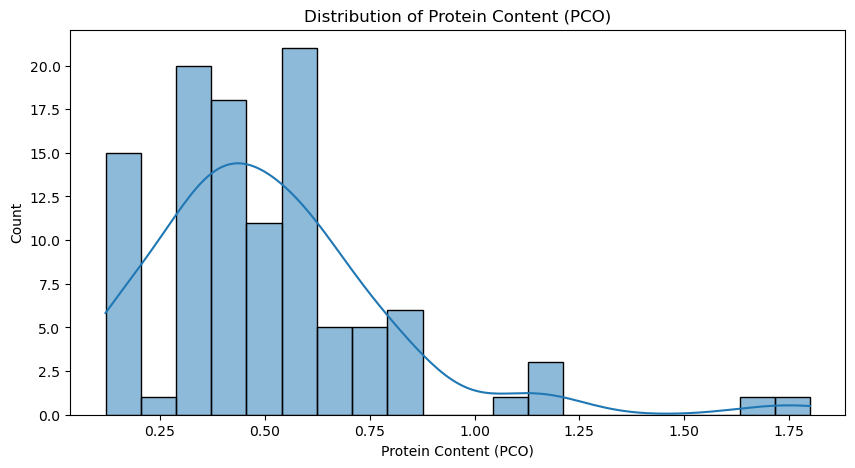

In [33]:
# Check distribution of target variable (PCO)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(Soy_set['Protein Content (PCO)'], bins=20, kde=True)
plt.title("Distribution of Protein Content (PCO)")
plt.xlabel("Protein Content (PCO)")
plt.ylabel("Count")
plt.show()

##### e) Data Visualization_

C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\F8871503\ProgramData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

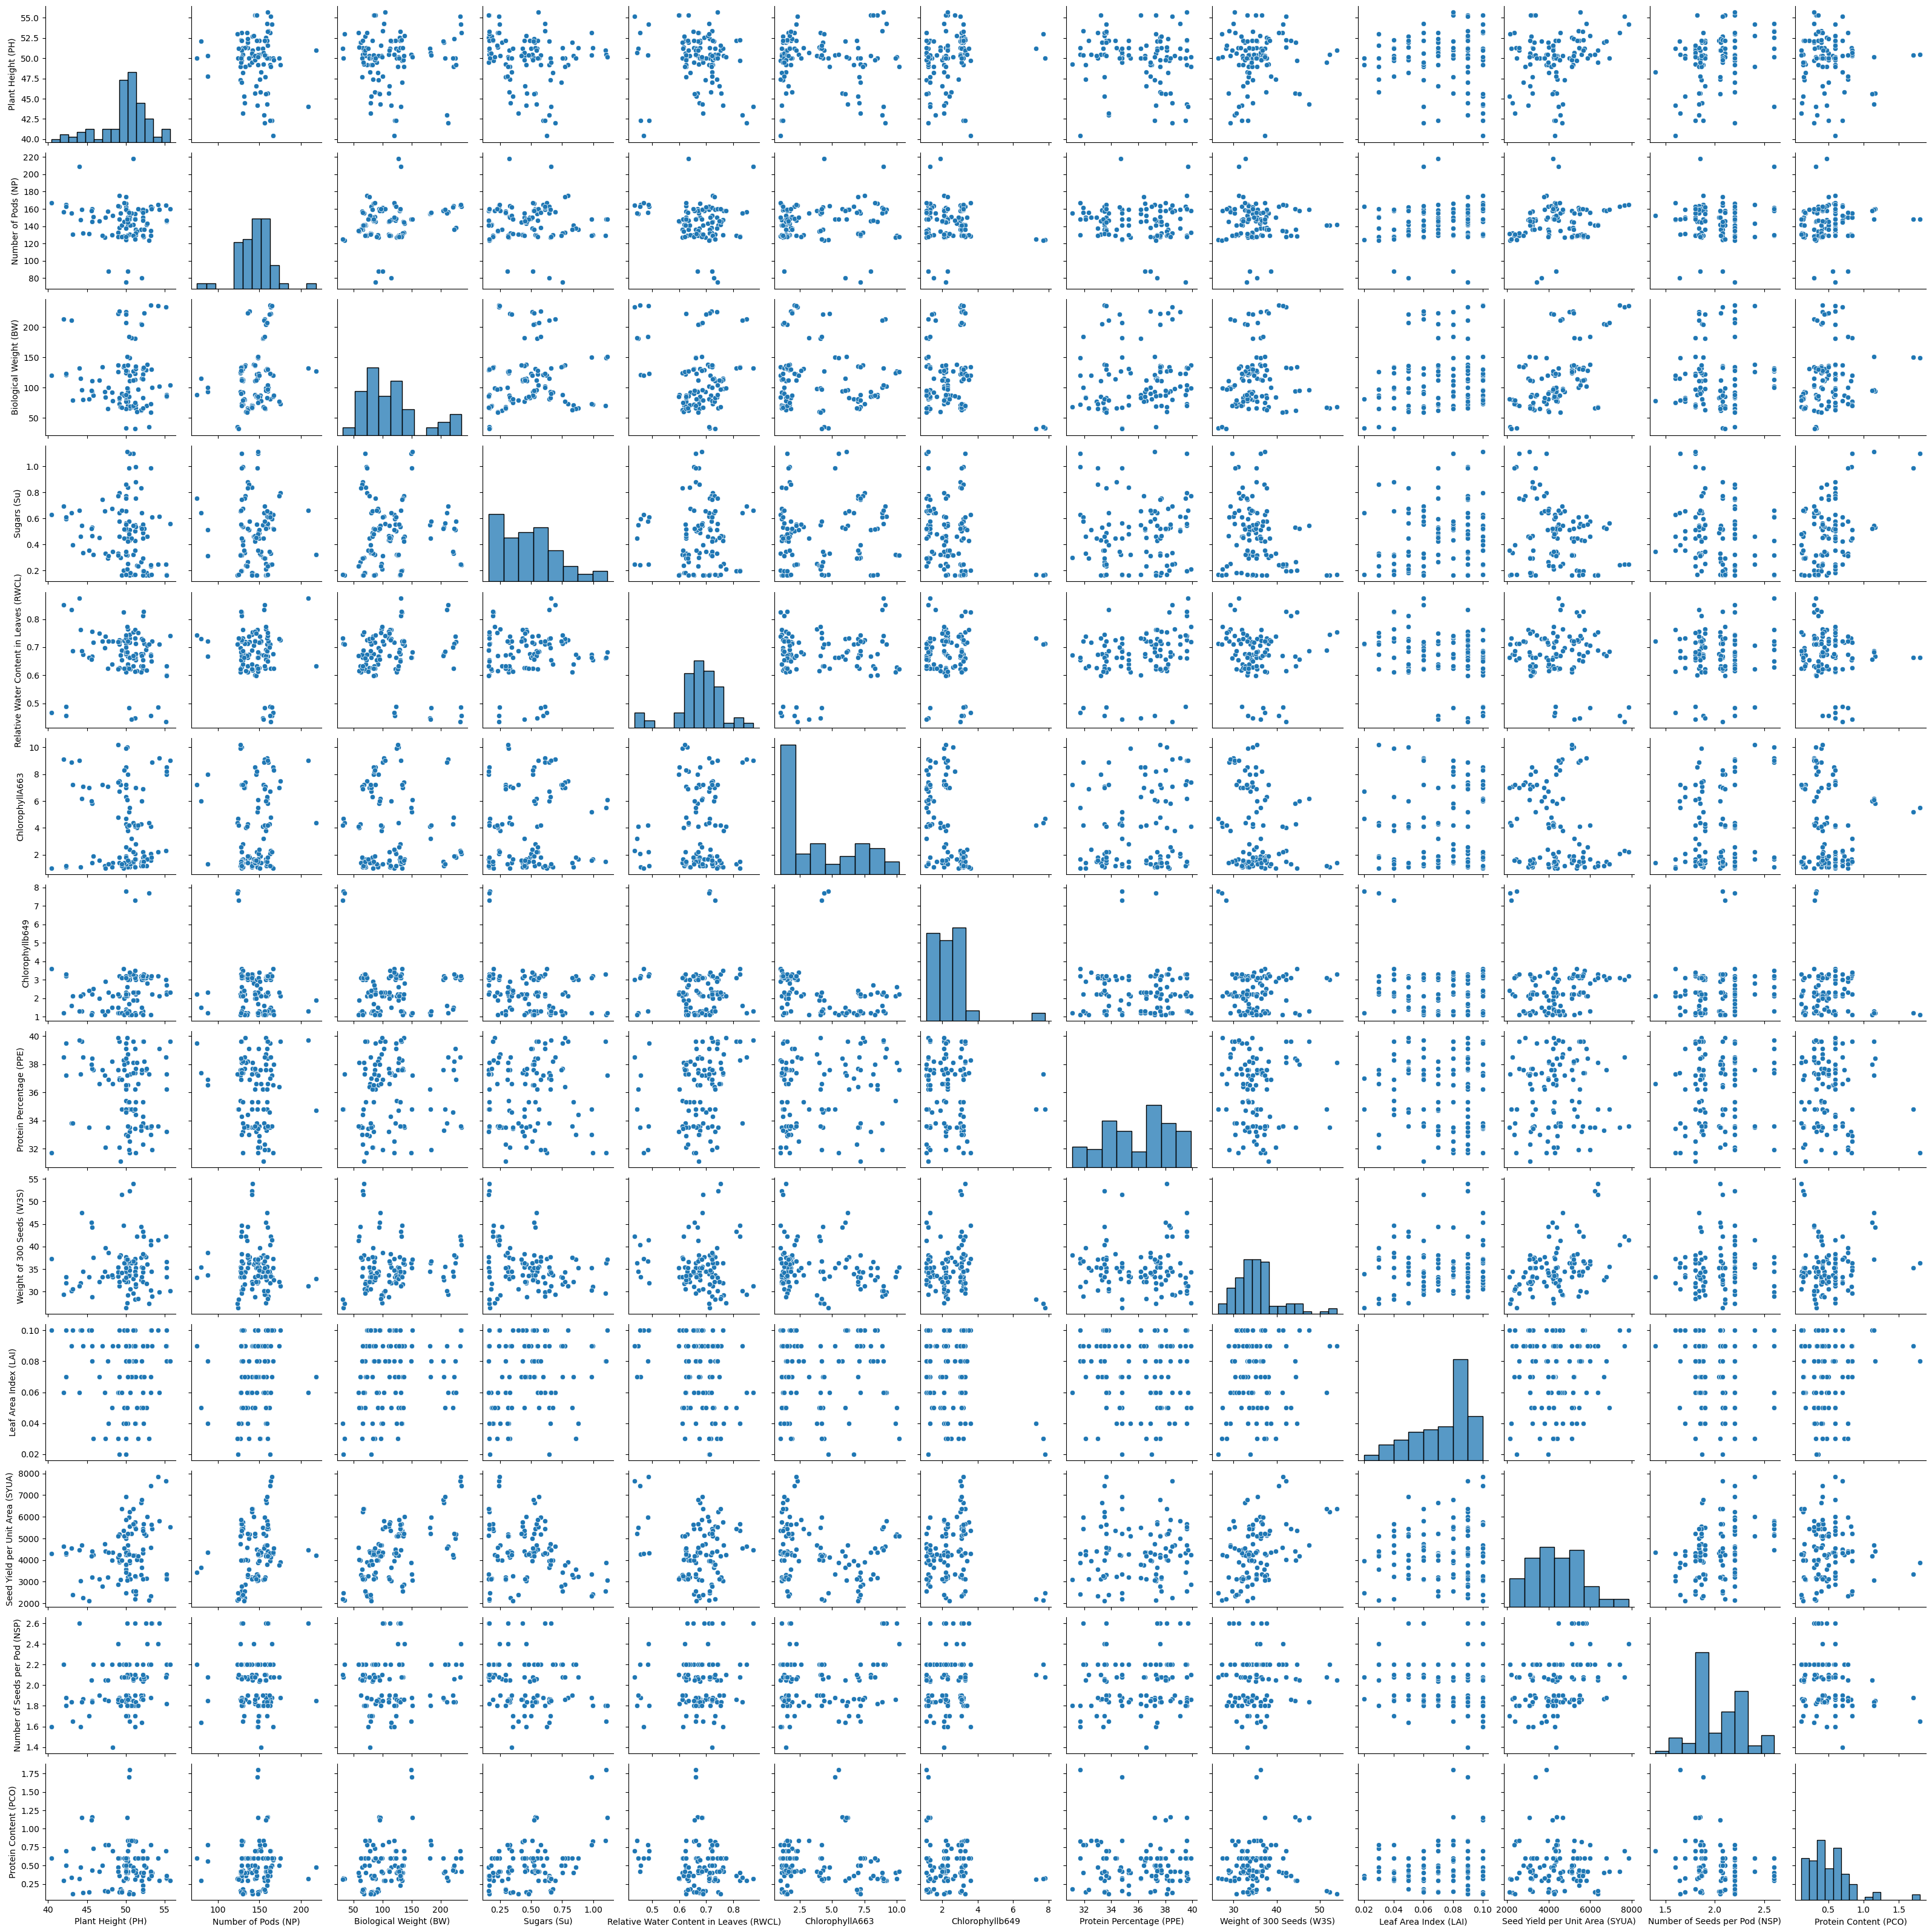

In [34]:
#1. Pairplot to see relationships between features
sns.pairplot(Soy_set)
plt.show()

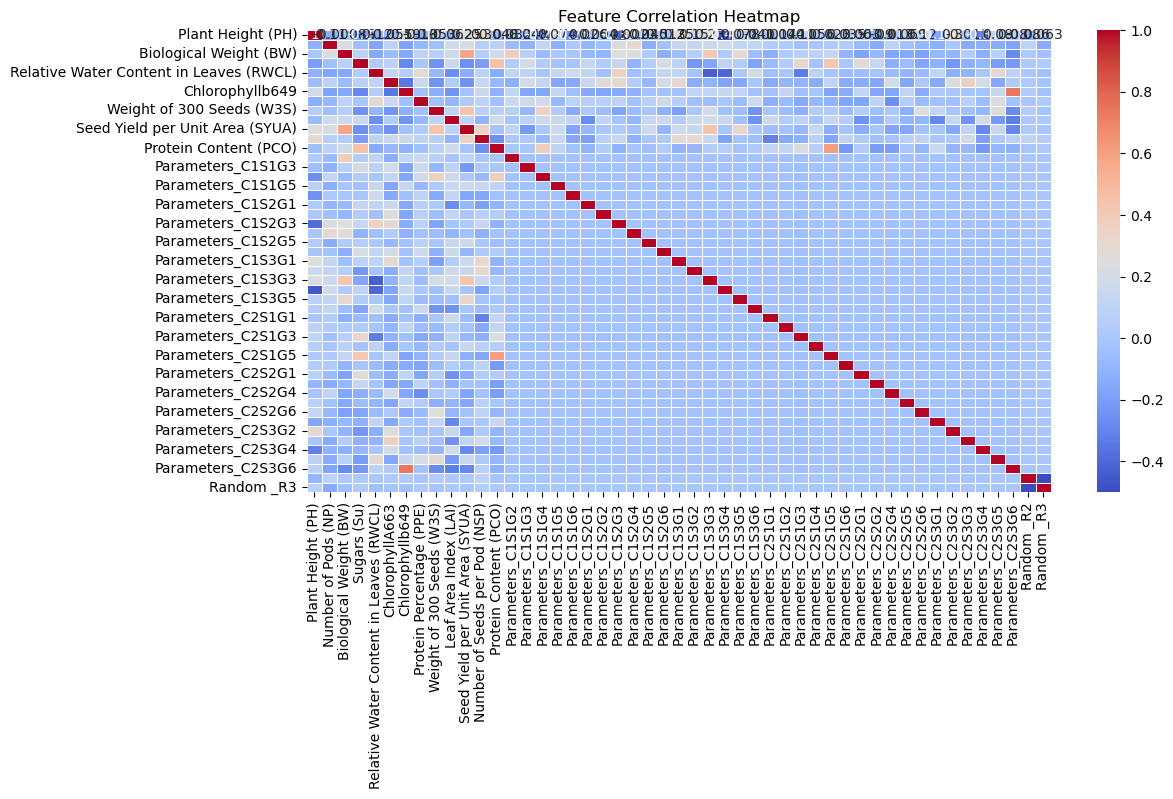

In [48]:
#2. Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(Soy_set.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

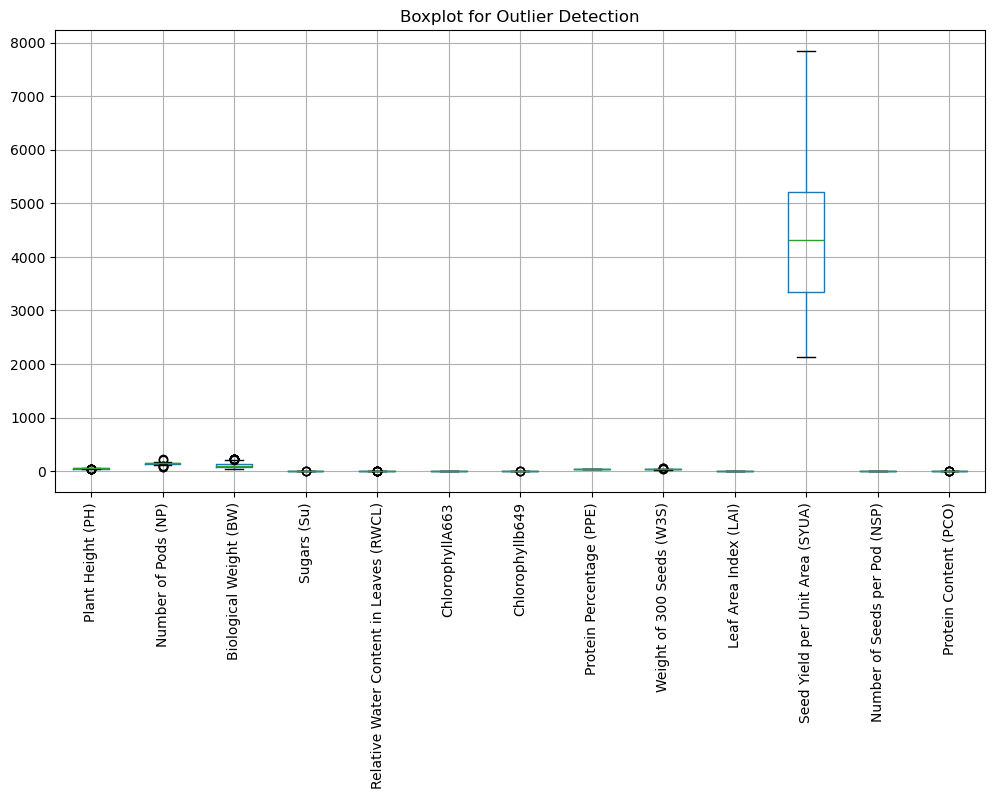

In [36]:
#3. Boxplot for all numerical columns to check for outliers
plt.figure(figsize=(12, 6))
Soy_set.boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot for Outlier Detection")
plt.show()

----------------------------------------------------------------End of Chapter 3------------------------------------------------------------------------

### 4. Feature Engineering: 

##### a) Feature Selection_

In [14]:
# Check data types of all columns
print(Soy_set.dtypes)

# Identify categorical columns
categorical_cols = Soy_set.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Parameters                                  object
Random                                      object
Plant Height (PH)                          float64
Number of Pods (NP)                        float64
Biological Weight (BW)                     float64
Sugars (Su)                                float64
Relative Water Content in Leaves (RWCL)    float64
ChlorophyllA663                            float64
Chlorophyllb649                            float64
Protein Percentage (PPE)                   float64
Weight of 300 Seeds (W3S)                  float64
Leaf Area Index (LAI)                      float64
Seed Yield per Unit Area (SYUA)            float64
Number of Seeds per Pod (NSP)              float64
Protein Content (PCO)                      float64
dtype: object
Categorical Columns: Index(['Parameters', 'Random '], dtype='object')


In [15]:
Soy_set = pd.get_dummies(Soy_set, columns=categorical_cols, drop_first=True)

# 👉 Note: One-hot encoding creates new columns for each category, making it more suitable for tree-based models (e.g., Random Forest, XGBoost).

In [16]:
from sklearn.preprocessing import StandardScaler

# Once categorical variables are encoded, run feature scaling:
scaler = StandardScaler()
Soy_set_scaled = Soy_set.copy()
Soy_set_scaled[Soy_set.columns.drop("Protein Content (PCO)")] = scaler.fit_transform(Soy_set.drop(columns=["Protein Content (PCO)"]))

In [18]:
# A. Check Feature Correlations with Target Variable (PCO)_

# Compute correlation with target variable (PCO)
correlation_matrix = Soy_set.corr()
pc_target_corr = correlation_matrix["Protein Content (PCO)"].sort_values(ascending=False)

# Display correlation values
print(pc_target_corr)

Protein Content (PCO)                      1.000000
Parameters_C2S1G5                          0.612801
Sugars (Su)                                0.450942
Parameters_C1S1G4                          0.373733
Parameters_C2S1G3                          0.228373
Biological Weight (BW)                     0.178915
Leaf Area Index (LAI)                      0.178292
Parameters_C2S3G1                          0.150343
Parameters_C2S1G2                          0.120949
Parameters_C2S1G1                          0.120949
Parameters_C1S1G5                          0.097434
Number of Pods (NP)                        0.078440
Weight of 300 Seeds (W3S)                  0.072685
Parameters_C2S1G4                          0.054324
Parameters_C1S3G4                          0.054324
Parameters_C1S2G2                          0.042566
Parameters_C1S3G3                          0.038647
Parameters_C1S2G6                          0.034728
Parameters_C2S2G1                          0.030809
Parameters_C

In [17]:
# B. Drop Low or Irrelevant Features (if needed)

# Drop low-correlation or redundant features (Example: 'Random' column if exists)
Soy_set.drop(columns=['Random'], inplace=True, errors='ignore')

##### b) Feature Scaling (Standardization / Normalization)_

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize standard scaler
scaler = StandardScaler()

# Scale numeric features (excluding target variable)
features = Soy_set.drop(columns=["Protein Content (PCO)"])
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
Soy_set_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add target variable back
Soy_set_scaled["Protein Content (PCO)"] = Soy_set["Protein Content (PCO)"]

##### c) Encoding Categorical Variables (if necessary)_

In [19]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns (if necessary)
categorical_cols = Soy_set.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    Soy_set[col] = le.fit_transform(Soy_set[col])

----------------------------------------------------------------End of Chapter 4------------------------------------------------------------------------

### 5. Model Building:

##### a) Train-Test Split Strategy_

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = Soy_set_scaled.drop(columns=["Protein Content (PCO)"])  # Independent variables
y = Soy_set_scaled["Protein Content (PCO)"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (86, 48), Testing Set: (22, 48)


##### b) Model Selection (Choosing the correct model)_

##### c) Model Training_

In [21]:
print(f"Missing values in target column: {y.isnull().sum()}")

Missing values in target column: 40


In [22]:
y.fillna(y.median(), inplace=True)  # Replace NaNs with median

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf")
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compute RMSE
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")

TypeError: got an unexpected keyword argument 'squared'

In [25]:
import sklearn
print(sklearn.__version__)

1.6.1


In [29]:
for name, model in models.items():
    print(f"Training {name}...")  # Debugging step
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Compute RMSE
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")  # Print RMSE

Training Linear Regression...
Linear Regression RMSE: 0.2987
Training Random Forest...
Random Forest RMSE: 0.2486
Training XGBoost...
XGBoost RMSE: 0.2800
Training SVR...
SVR RMSE: 0.2630


In [30]:
print(X_train.shape, y_train.shape)
print(X_train.dtypes)
print(y_train.dtypes)

(86, 48) (86,)
Plant Height (PH)                          float64
Number of Pods (NP)                        float64
Biological Weight (BW)                     float64
Sugars (Su)                                float64
Relative Water Content in Leaves (RWCL)    float64
ChlorophyllA663                            float64
Chlorophyllb649                            float64
Protein Percentage (PPE)                   float64
Weight of 300 Seeds (W3S)                  float64
Leaf Area Index (LAI)                      float64
Seed Yield per Unit Area (SYUA)            float64
Number of Seeds per Pod (NSP)              float64
Parameters_C1S1G2                          float64
Parameters_C1S1G3                          float64
Parameters_C1S1G4                          float64
Parameters_C1S1G5                          float64
Parameters_C1S1G6                          float64
Parameters_C1S2G1                          float64
Parameters_C1S2G2                          float64
Parameters_C1S2G

In [31]:
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [32]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually take square root

In [33]:
print("Final RMSE Results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Final RMSE Results:
Linear Regression: 0.2987
Random Forest: 0.2486
XGBoost: 0.2800
SVR: 0.2630


##### d) Cross-Validation (K-Fold validation)_

In [ ]:
from sklearn.model_selection import cross_val_score

# This will validate model performance across multiple data splits.
# Perform 5-Fold Cross-Validation for the best model
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="neg_root_mean_squared_error")

# Display cross-validation results
print(f"Cross-Validation RMSE: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

----------------------------------------------------------------End of Chapter 5------------------------------------------------------------------------

----------------------------------------------------------------End of Chapter 6------------------------------------------------------------------------

----------------------------------------------------------------End of Chapter 7------------------------------------------------------------------------

----------------------------------------------------------------End of Chapter 8------------------------------------------------------------------------